In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import string
import random
seed = 42
np.random.seed(seed)

# Goal:
Generate two graphs with different structures, but containing the same nodes.

We start with two graphs with the same number of nodes, but with a different structure.

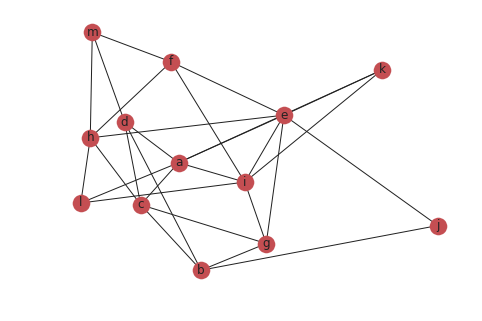

In [2]:
bx = nx.binomial_graph(n=13, p=0.3, seed=seed)

for (u, d) in bx.nodes(data=True):
    d['alpha'] = random.randint(1,2)
    d['beta'] = random.randint(1,2)
for (u,v,w) in bx.edges(data=True):
    w['weight'] = random.randint(0,10)

letters = string.ascii_lowercase
rename_map = {k:string.ascii_lowercase[k] for k in range(len(bx))}
bx = nx.relabel_nodes(bx, rename_map)
# nx.watts_strogatz_graph(10)
nx.draw(bx, with_labels=True)


13


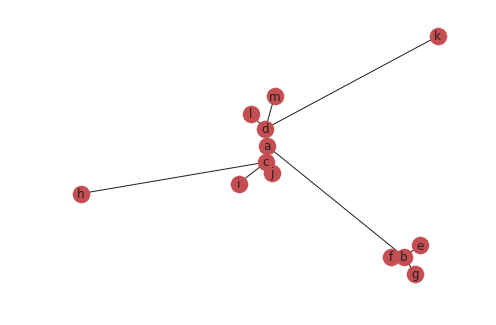

In [3]:
bt = nx.balanced_tree(3,2)
print(len(bt))
# Add random weights on edges
for (u, d) in bt.nodes(data=True):
    d['alpha'] = random.randint(2,3)
    d['beta'] = random.randint(2,3)
for (u,v,w) in bt.edges(data=True):
    w['weight'] = random.randint(0,10)

# Change the name of the labels of the graph
letters = string.ascii_lowercase
rename_map = {k:string.ascii_lowercase[k] for k in range(len(bt))}
bt = nx.relabel_nodes(bt, rename_map)
nx.draw(bt, with_labels=True)
# This works

[('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'i'), ('a', 'k'), ('a', 'l'), ('b', 'c'), ('b', 'd'), ('b', 'g'), ('b', 'j'), ('c', 'd'), ('c', 'g'), ('c', 'h'), ('d', 'm'), ('e', 'f'), ('e', 'g'), ('e', 'h'), ('e', 'i'), ('e', 'j'), ('e', 'k'), ('f', 'h'), ('f', 'i'), ('f', 'm'), ('g', 'i'), ('h', 'l'), ('h', 'm'), ('i', 'k'), ('i', 'l')]


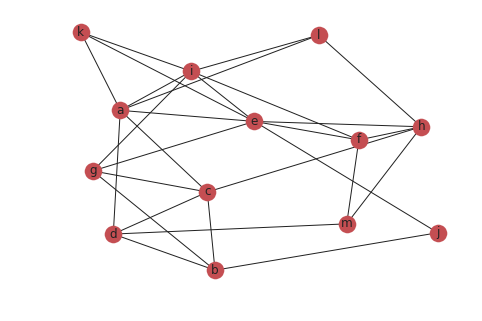

In [4]:
bt_edges = [(u,v) for u,v in bt.edges()]

bx_edges = [(u,v) for u,v in bx.edges()]
bx_data  = 23
print(bx_edges)
ng = bt.copy()

ng.remove_edges_from(bt_edges)
ng.add_edges_from(bx_edges)
nx.draw(ng, with_labels=True)

In [5]:
[(u,v,d) for (u,v,d) in bt.edges(data=True)]

[('a', 'b', {'weight': 0}),
 ('a', 'c', {'weight': 9}),
 ('a', 'd', {'weight': 8}),
 ('b', 'e', {'weight': 3}),
 ('b', 'f', {'weight': 9}),
 ('b', 'g', {'weight': 3}),
 ('c', 'h', {'weight': 0}),
 ('c', 'i', {'weight': 1}),
 ('c', 'j', {'weight': 10}),
 ('d', 'k', {'weight': 0}),
 ('d', 'l', {'weight': 3}),
 ('d', 'm', {'weight': 1})]

In [6]:
node_data = {u:d for u,d in bt.nodes(data=True)}
print(node_data)

{'a': {'alpha': 3, 'beta': 2}, 'b': {'alpha': 2, 'beta': 2}, 'c': {'alpha': 2, 'beta': 2}, 'd': {'alpha': 3, 'beta': 2}, 'e': {'alpha': 2, 'beta': 2}, 'f': {'alpha': 3, 'beta': 2}, 'g': {'alpha': 3, 'beta': 3}, 'h': {'alpha': 2, 'beta': 2}, 'i': {'alpha': 3, 'beta': 3}, 'j': {'alpha': 3, 'beta': 3}, 'k': {'alpha': 3, 'beta': 2}, 'l': {'alpha': 2, 'beta': 2}, 'm': {'alpha': 2, 'beta': 3}}


In [7]:
[data['alpha'] for data in node_data.values()]
[data['beta'] for data in node_data.values()]

[2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]

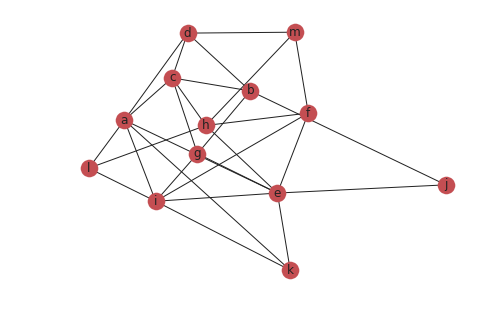

In [8]:
G_copy = nx.Graph()
G_copy.add_nodes_from(bt.nodes(data=True))
G_copy.add_edges_from(bx.edges(data=True))
nx.draw(G_copy, with_labels=True)

The previous line is likely the most efficient mechanism of copying both the nodes, their attributes and their corresponding data.

---------

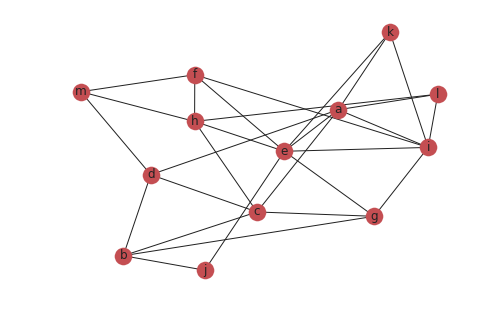

In [9]:
bx = nx.binomial_graph(n=13, p=0.3, seed=seed)

for (u, d) in bx.nodes(data=True):
    d['alpha'] = random.randint(2,4)
    d['beta'] = random.randint(2,4)
for (u,v,w) in bx.edges(data=True):
    w['weight'] = random.randint(0,10)

letters = string.ascii_lowercase
rename_map = {k:string.ascii_lowercase[k] for k in range(len(bx))}
bx = nx.relabel_nodes(bx, rename_map)
# nx.watts_strogatz_graph(10)
nx.draw(bx, with_labels=True)

In [10]:
from scipy.stats import beta

class Agent:
    def __init__(self, id, alpha=2, beta=2):
        self.id = id
        self.alpha = alpha
        self.beta = beta
    
    def __str__(self):
        return str(self.id)
    
    def __repr__(self):
#         return "id: %s, alpha: %s, beta: %s" % (self.id, self.alpha, self.beta)
        return str(self.id)
        
    def compute_mode(self):
        mode = (self.alpha - 1) / (self.alpha + self.beta - 2)
#         print(mode)
        return mode

In [11]:
from collections import defaultdict

def make_agent_graph(input_graph):
    G = nx.Graph()
    # bx_node = {u:d for u,d in bt.nodes(data=True)}
    bx_node = [(u, d) for (u,d) in input_graph.nodes(data=True)]
    # print(bx_node)
    mt = defaultdict() #mapping table
    for item in bx_node:
        node_id = item[0]
        node_alpha = item[1]['alpha']
        node_beta  = item[1]['beta']
        node = Agent(node_id, alpha= node_alpha, beta = node_beta)
        mt[node_id] = node
        node.compute_mode()
        G.add_node(node)

    bx_edge = [(mt[u], mt[v], d) for (u,v,d) in input_graph.edges(data=True)]
    G.add_edges_from(bx_edge)
    return G

In [12]:
H = make_agent_graph(bt)

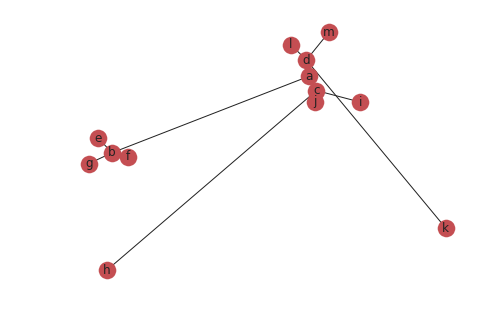

In [13]:

nx.draw(H, with_labels=True)

In [15]:
[(u,v,d) for (u,v,d) in H.edges(data=True)]


[(a, b, {'weight': 0}),
 (a, c, {'weight': 9}),
 (a, d, {'weight': 8}),
 (b, e, {'weight': 3}),
 (b, f, {'weight': 9}),
 (b, g, {'weight': 3}),
 (c, h, {'weight': 0}),
 (c, i, {'weight': 1}),
 (c, j, {'weight': 10}),
 (d, k, {'weight': 0}),
 (d, l, {'weight': 3}),
 (d, m, {'weight': 1})]

In [16]:
[(u,d) for (u,d) in H.nodes(data=True)]


[(a, {}),
 (b, {}),
 (c, {}),
 (d, {}),
 (e, {}),
 (f, {}),
 (g, {}),
 (h, {}),
 (i, {}),
 (j, {}),
 (k, {}),
 (l, {}),
 (m, {})]